In [16]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sct
import seaborn as sns
%matplotlib inline

In [8]:
mu_10_sigma_5 = sct.norm.rvs(10, 5, 100)
test_t_1pop = sct.ttest_1samp(mu_10_sigma_5, popmean=10) # bicaudal

In [11]:
test_t_1pop.pvalue

0.33231544624252674

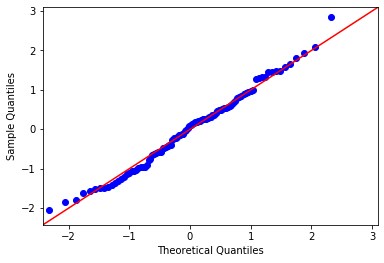

In [21]:
sm.qqplot(mu_10_sigma_5, fit=True, line='45');

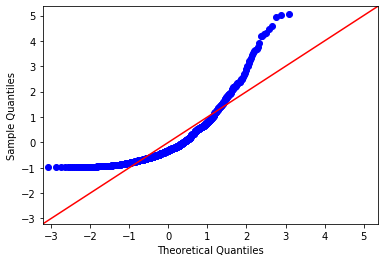

In [24]:
sm.qqplot(sct.expon.rvs(size=1000), fit=True, line='45');

# Teste de comparação das médias de duas amostras
Outro cenário bastante comum é querermos comparar as médias de duas amostras diferentes para descobrirmos se as duas amostras vêm de distribuições de mesma média.

Entendido o teste anterior, o racional do presente teste é bem direto: usamos a diferença entre as duas médias amostrais e os respectivos desvios-padrão no cálculo da estatística de teste $t$. Ou seja,

$$t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s_{1}^{2} + s_{2}^{2}}}$$
onde $\bar{x}_{1}$ e $\bar{x}_{2}$ são as médias da primeira e segunda amostras e $s_{1}$ e $s_{2}$ são os desvios-padrão das duas amostras.

Sob $H_{0}$, é possível mostrar que $t$ tem distribuição $t$-Student com $n_{1} + n_{2} - 2$ graus de liberdade, onde $n_{1}$ e $n_{2}$ são os tamanhos das amostras.

A interpretação do resultado de $t$ com relação ao nível de significância e consequente rejeição (ou não) de $H_{0}$ é análoga ao teste anterior.

In [22]:
data_one = sct.expon.rvs(scale=8, size=100) # Mesmas distribuições.
data_two = sct.expon.rvs(scale=8, size=100)

sct.ttest_ind(data_one, data_two) # Não deveria rejeitar H_0.

Ttest_indResult(statistic=-0.6848330780303269, pvalue=0.4942501418446392)

In [50]:
data_one = sct.expon.rvs(scale=8, size=100) # Distribuições diferentes.
data_two = sct.expon.rvs(scale=12, size=100)

sct.ttest_ind(data_one, data_two) # Deveria rejeitar H_0.

Ttest_indResult(statistic=-1.0784691004254245, pvalue=0.28213654755581496)

# Shapiro (Até 5k pontos)

In [52]:
normal_data = sct.norm.rvs(10, 4, 100) 
sct.shapiro(normal_data) # Stats, p_value

(0.9909255504608154, 0.7390701770782471)

In [53]:
exp_data = sct.expon.rvs(scale=4, size=100)
sct.shapiro(exp_data)

(0.7571247816085815, 1.4506584301854364e-11)

# Jarque Bera (Cuidado com poucos pontos)

In [54]:
sct.jarque_bera(normal_data)

(0.5955978001629558, 0.7424506314974928)

In [55]:
sct.jarque_bera(exp_data)

(113.8594679691451, 0.0)